# CSC-321: Data Mining and Machine Learning

# Manav Bilakhia

## Assignment 2: Simple Linear Regression

### Part 1: Implementing SLR

Refer to the class slides for an overview of how simple linear regression works. Then implement the following algorithms. I will NOT be grading you on the style elements of your code (although I may give feedback) however you should try to use good programming style, especially with respect to variable names, spacing, printing of results and sensible code choices.

The dataset I've given you here is REALLY small. Why? Because I want you to be able to check your math. You should be able to see what the variance, covariance and coefficients should be using a calculator. DO NOT just rely on the computer generated number, and assume it's correct. 

The data here contains 5 instances, and 2 features. The first element in each sublist is the input feature, X, and the second element is the target value, y.

Be careful when coding that you do not overly rely on the fact that there is ONLY one column of input data for X here.

(a) First, read the following example page for matplotlib, and create a plot of the points in the data set. Make the data points blue triangles. Make the axis in both directions range from 0 to 6.

https://matplotlib.org/stable/tutorials/introductory/pyplot.html#sphx-glr-tutorials-introductory-pyplot-py

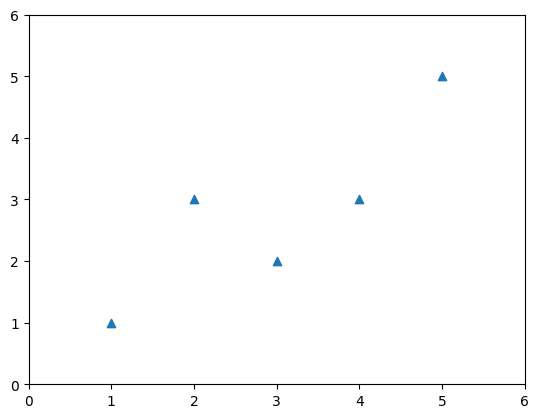

In [9]:
%matplotlib inline

import matplotlib.pyplot as plt

# Use this dataset for all examples

dataset = [[1,1],[2,3],[4,3],[3,2],[5,5]]

x_coords = [x[0] for x in dataset]
y_coords = [x[1] for x in dataset]

# Create a scatter plot with blue triangles
plt.scatter(x_coords, y_coords, marker = "^")

# Set the axis limits
plt.xlim(0, 6)
plt.ylim(0, 6)

# Show the plot
plt.show()


(b) Create a function that returns the average (the mean) for any list of values.

(c) Create a function that computes the total variance of a list of values. NOTE - NOT the average variance as discussed in class, the total. That is, for each value of X, subtract the mean and square the result. Sum the resulting values, and return. The function takes two arguments, a list of values and the mean of that list of values.

(d) Create a function that computes the covariance between two lists of numbers. Given two lists (X and y), and two means for those lists, for each value in X, subtract the mean of X, and then multiply by the corresponding value of (y minus the mean of y). Sum the resulting values and return. 

(e) Using your functions above, write a function that given two lists, one of X values and one of y values, computes the two coefficients, b1 and b0. Remember, b1 is computed by dividing the covariance of X and y by the variance of X. b0 is computed by taking the mean of y, and subtracting b1 multiplied by the mean of X from it. Return the two coefficients, b0 and b1, in that order, in a single list. 

(f) Test your coefficients function, with the dataset given. That means slice the data above into a list of X values, and a list of y values. Pass those lists to the functions described above to generate the coefficients. Print both of the resulting coefficients nicely.

In [10]:
# Write your functions b thru f here
def calculate_mean(lst):
    if len(lst) == 0:
        return 0.0  # Return 0 if list is empty to avoid division by zero error
    return sum(lst) / len(lst)

def calculate_total_variance(lst, mean):
    if len(lst) == 0:
        return 0.0  # Return 0 if list is empty
    
    return sum([(x - mean) ** 2 for x in lst])

def calculate_covariance(X, mean_X, y, mean_y):
    if len(X) == 0 or len(y) == 0:
        return 0.0  # Return 0 if either list is empty
    
    return sum([(X[i] - mean_X) * (y[i] - mean_y) for i in range(len(X))])
    
def calculate_regression_coefficients(X, y):
    if len(X) == 0 or len(y) == 0:
        return [0.0, 0.0]  # Return [0, 0] if either list is empty
    
    mean_X = calculate_mean(X)
    mean_y = calculate_mean(y)
    
    covariance = calculate_covariance(X, mean_X, y, mean_y)
    variance_X = calculate_total_variance(X, mean_X)
    
    b1 = covariance / variance_X
    b0 = mean_y - b1 * mean_X
    
    return [b0, b1]

dataset = [[1,1],[2,3],[4,3],[3,2],[5,5]]

X = [X[0] for X in dataset]
y = [X[1] for X in dataset]

b0,b1 = calculate_regression_coefficients(X,y)

print("b0 = ",b0)
print("b1 = ",b1)




b0 =  0.39999999999999947
b1 =  0.8


We're going to use a convention here - capital X is the input feature(s), lower case y is the thing to predict. 

We're going to create four lists. Those will be called:
1. X_train
2. y_train

1 and 2 comprise the data we'll use to train the model; 

3. X_test
4. y_test

X_test is the data we'll apply the model to, to predict the y values. 

y_test are the REAL y values for the X_test data and we can match those against the predicted y values to measure performance.

In this assignment we're going to use the exactly the same data here for both training and testing. That is, there will be 5 instances for training, and then we'll predict y values for those same 5 instances. Does this seem like a good idea? We'll talk about it in class later. 

(g) Now you have sufficient functionality to write a function to make predictions using simple linear regression. Create a function that takes THREE lists as arguments: two for training (X_train, y_train) and one for testing (X_test).

Here's the simple linear regression algorithm. Make this into a function.

Using the functions you wrote earlier, we're going to create our coefficients from the training data. We're going to create a new list, to hold our predictions. Then for each instance in the X_test data, we're going to read the input value, and apply the formula 

> **y = b0 + b1 * x(i)**

For each entry in the X_test data, we're going to have a predicted y value, which we'll append to our list of predictions. At the end, we're going to return our list of predictions.

(h) Call your simple linear regression function, with the dataset above split appropriately into X_train, y_train, X_test and y_test. In this example, X_train and X_test will be the same, and y_train and y_test will be the same. Print the predicted output and the real output, nicely.

(i) Recreate the plot from (a) above, plotting the points the same as before, by plotting your X_test values against your y_test values.
But this time **ALSO** plot a line (X_test against predicted y) in red, that shows how well the slr algorithm is modeling the output. 

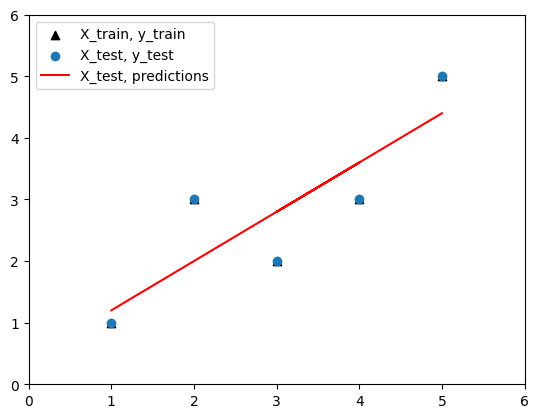

In [11]:
# Create your four datasets here
X_train = [X_train[0] for X_train in dataset]
y_train = [X_train[1] for X_train in dataset]

X_test = [X_test[0] for X_test in dataset]
y_test = [X_test[1] for X_test in dataset]


# Write the function for simple linear regression here
def simple_linear_regression(X_train, y_train, X_test):
    predictions = list()
    b0, b1 = calculate_regression_coefficients(X_train, y_train)
    for x in X_test:
        y = b0 + b1 * x
        predictions.append(y)
    return predictions



# Call the function below

predictions = simple_linear_regression(X_train, y_train, X_test)


# Plot the results
# Create a scatter plot with blue triangles
plt.scatter(X_train, y_train, marker = "^",color = "black",label = "X_train, y_train")
plt.scatter(X_test, y_test, label = "X_test, y_test")
plt.plot(X_test, predictions, color = 'red', label = "X_test, predictions")

# Set the axis limits
plt.xlim(0, 6)
plt.ylim(0, 6)

plt.legend()

# Show the plot
plt.show()



### Part 2: Implementing zeroR

In class we learned about the zeroR algorithm. For regression, that means that we will always predict the mean value of the y_train variable - the target. 

(a) Write the function zeroRR (for regression) below. This function will take two arguments, y_train and X_test data. We **could** also pass it X_train, just to be consistent with our slr function above (which is was scikit learn does), but we know that zeroR NEVER looks at the X_train data, so we wont bother.

Your zeroRR function will compute the mean from the y_train values. For prediction, it will assign this mean to every X_test instance, and append this prediction to a list. Return the list of predictions. 

(b) Test your zeroRR function, with the datasets as defined above. Print the input and the predicted output. Nicely.

(c) Recreate the plot from (i) in Part 1, above. Plot the points, the predicted output y from the simple linear regression algorithm, and now add the predicted output y from the zeroRR algorithm as another line, this time in green.

Input data:
y_train = [1, 3, 3, 2, 5]
X_test = [1, 2, 4, 3, 5]

Predicted output:
zeroR predictions = [2.8, 2.8, 2.8, 2.8, 2.8]


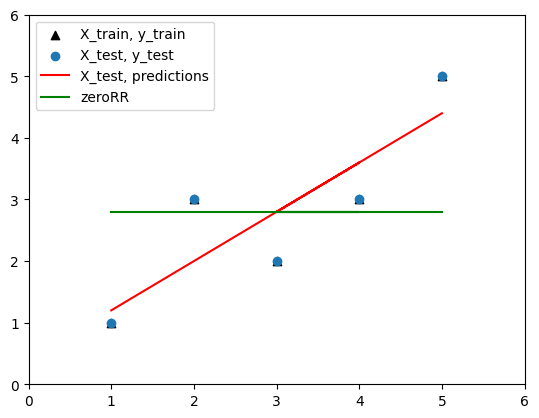

In [12]:
# Write the function for zeroRR here
def zeroRR(y_train, X_test):
    y_mean = calculate_mean(y_train)
    predictions = [y_mean] * len(X_test)
    return predictions


# Call the function zeroRR below
zeroR_predictions = zeroRR(y_train, X_test)

# Print input and predicted output
print("Input data:")
print("y_train =", y_train)
print("X_test =", X_test)
print("\nPredicted output:")
print("zeroR predictions =", zeroR_predictions)


# Plot the results
predictions = simple_linear_regression(X_train, y_train, X_test)



# Plot the results
# Create a scatter plot with blue triangles
plt.scatter(X_train, y_train, marker = "^",color = "black",label = "X_train, y_train")
plt.scatter(X_test, y_test, label = "X_test, y_test")
plt.plot(X_test, predictions, color = 'red', label = "X_test, predictions")
plt.plot(X_test, zeroR_predictions, color = "green", label = "zeroRR")

# Set the axis limits
plt.xlim(0, 6)
plt.ylim(0, 6)

plt.legend()

# Show the plot
plt.show()






### Part 3: Evaluating output

We want to be able to evaluate the output of our algorithms. We will implement the RMSE algorithm discussed in class for evaluating performance. This function will take two lists of values - actual y values and predicted y values.

(a) Write a function that calculates RMSE. Start with an error of 0.0, then go through each y value in the actual list, and calculates the prediction error by subtracting the actual from the predicted value, and squares the error. Those squared errors are summed for all instances and then the average squared error is calculated, dividng the sum of the square errors by the number of predictions. Return the square root of that average error.

In [13]:
# Write the function rmse(actual,predicted) below
import math
def rmse (actual, predicted):
  error = 0.0
  for i in range(len(actual)):
      prediction_error = predicted[i] - actual[i]
      error += prediction_error ** 2
  mean_error = error / len(actual)
  return math.sqrt(mean_error)

### Part 4: Putting it all together

Given the dataset below:
- split into four sets, X_train, y_train, X_test and t_test, where X_train and X_test contain the same values, and y_test and y_train also. 

- Pass these appropriate arguments to both your simple linear regression code, and your zeroRR code, generating list of predictions for each.

- Evaluate these predictions against the real values (y_test)

- Print the results nicely

- FINALLY, edit the text box after this code, telling me which algorithm works better, simple linear regression or zeroRR, and why you believe that

In [14]:
# Evaluate the two algorithms, using RMSE
# And the dataset below
dataset = [[1,1],[2,3],[4,3],[3,2],[5,5]]
X_train = [X_train[0] for X_train in dataset]
y_train = [X_train[1] for X_train in dataset]

X_test = [X_test[0] for X_test in dataset]
y_test = [X_test[1] for X_test in dataset]

predictions = simple_linear_regression(X_train, y_train, X_test)
zeroR_predictions = zeroRR(y_train, X_test)

rmse1 = rmse(y_test, predictions)
rmse2 = rmse(y_test, zeroR_predictions)

print('RMSE score for linear regression: {:.2f}'.format(rmse1))
print('RMSE score for zeroR: {:.2f}'.format(rmse2))

RMSE score for linear regression: 0.69
RMSE score for zeroR: 1.33


#### Interpretation of results
Here we see that RMSE for the logistic regression is lower than the zeroR. This is something that we would expect because, we only use the mean to calculate and are not really predicting something new especially because all elements in our zeroR prediction array are the same.

The error in zeroR is higher than logistic regression even though both predictions arent realy far off from each other. This is because rmse tends to weigh small errors much heavily. 

### Part 5: Introduction to scikit-learn

One of the most popular open-source python machine learning libraries is scikit-learn.

As we go through this class I'll introduce you to some of the functionality. Below I use both the linear regression and zeroR functionality, as well as using a built-in evaluation metric.

Recreate the four lists X_train, y_train, X_test and y_test as you would have for the previous examples, using the same data for both training and testing. Then the following code should run. 

Note that I have to do some reshaping, to make them into 2D arrays from the 1D list that python uses. This is just a requirement of scikit-learn, and you can see how I do it below.

Also note how I use variable names. You will find that it is INCREDIBLY easy to confuse yourself with the names of models and variables. Try early on to develop a consistent approach to naming. It will help.

You can use the final output of this code to check the results of your code, above. The RMSE values should be the same (possibly a 0.01 difference).

You can find out more in general at: https://scikit-learn.org/stable/index.html


In [15]:
# Import required libraries, two classifiers and the built in MSE metric
# See the following for details:
#
# https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyRegressor.html
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html

import math
import numpy as np
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


dataset = [[1,1],[2,3],[4,3],[3,2],[5,5]]

# **************************************************************************
# CREATE YOUR X_train,y_train, X_Test,y_test datasets here
X_train = [X_train[0] for X_train in dataset]
y_train = [X_train[1] for X_train in dataset]

X_test = [X_test[0] for X_test in dataset]
y_test = [X_test[1] for X_test in dataset]




# **************************************************************************
# I make those into numpy arrays, and reshape them

# Reshaping here means I'm telling numpy
# I KNOW the shape of one of the dimensions (it's 1)
# The -1 tells numpy to figure it out, using the length
# of the vector (-1 basically means unknown)

# Because I know that there are FIVE instances,
# I COULD have written
# .reshape(5,1) 
# for the X_train / X_test
# But as I KNOW it's a SOMETHING by 1
# if I do reshape(-1,1), then this same code will work
# with a 100 instances just as it will work with 5 instances.

X_train = np.array(X_train).reshape(-1, 1)
y_train = np.array(y_train)

X_test = np.array(X_test).reshape(-1, 1)
y_test = np.array(y_test)


# Instantiate an object of the linear regression class
lr = LinearRegression()

# Fit the linear regression model using the features and the class
# In scikit-learn, all models have a fit method
# THIS is machine learning. Tadaa.

reg = lr.fit(X_train,y_train)


# Exploring some built in concepts of the trained model
# Examining b0 and b1 coefficients

print('INTERCEPT (b0):',reg.intercept_ )
print('COEFFICIENT (b1):',reg.coef_ )
print()


# The fit() method produces a model (that I stored in the variable 'reg')
# We can now apply that model to new data using the predict method
# So here I apply it to the X values (the input)
# in order to PREDICT output values (y).

lr_predY = reg.predict(X_test)


# Now I'm to repeat this, using zeroR. In scikit this is called the
# dummy classifier

zr = DummyRegressor()
zeroR = zr.fit(X_train, y_train)
zr_predY = zeroR.predict(X_test)


# And I'm going to evaluate the results
# scikit has a built in metric for MSE. To get to RMSE 
# I simply take the square root of MSE.

slr_rmse = math.sqrt(mean_squared_error(y_test,lr_predY))
zr_rmse = math.sqrt(mean_squared_error(y_test,zr_predY))

print('RMSE score for linear regression: {:.2f}'.format(slr_rmse))
print('RMSE score for zeroR: {:.2f}'.format(zr_rmse))



INTERCEPT (b0): 0.3999999999999999
COEFFICIENT (b1): [0.8]

RMSE score for linear regression: 0.69
RMSE score for zeroR: 1.33
